Import labraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Data Collection and Data Processing

In [13]:
# loading the data by pandas
diabetes_data = pd.read_csv("/content/diabetes.csv")

In [16]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# numbers from rows and columns
diabetes_data.shape

(768, 9)

In [19]:
# missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# statistical measures of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

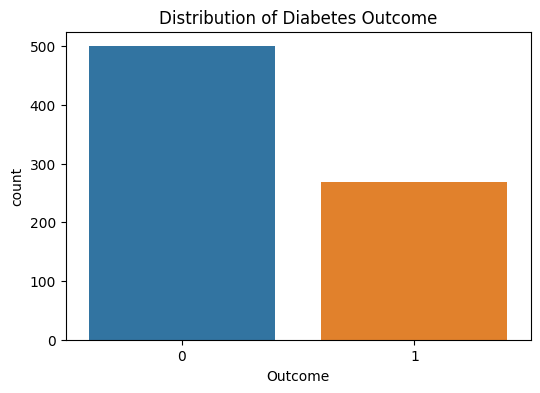

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=diabetes_data, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.show()

0 ----> with diabetes

1 ----> without diabetes

In [22]:
correlation = diabetes_data.corr()

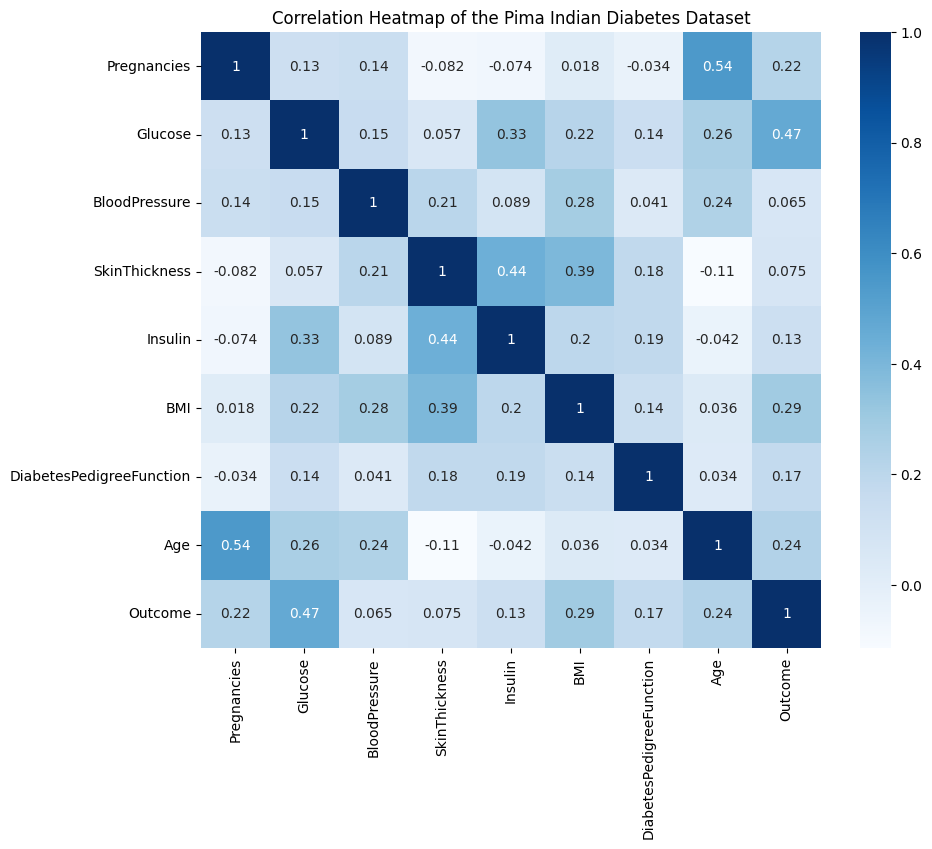

In [27]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap="Blues", annot=True)
plt.title('Correlation Heatmap of the Pima Indian Diabetes Dataset')
plt.show()

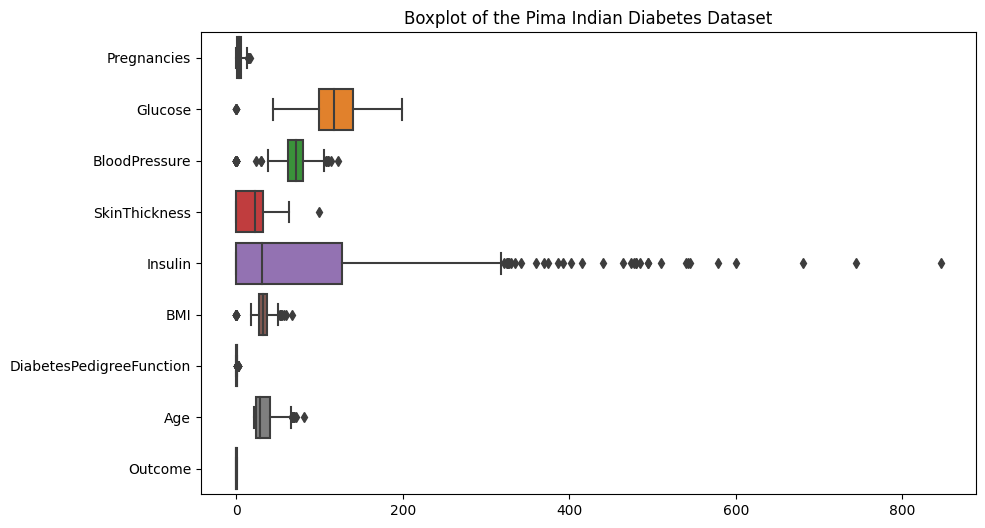

In [31]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, orient='h')
plt.title('Boxplot of the Pima Indian Diabetes Dataset')
plt.show()

Splitting the Data & Target

In [32]:
X = diabetes_data.drop(['Outcome'] , axis=1)
Y = diabetes_data['Outcome']

In [33]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Splitting the data into training data and testing data


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training


In [36]:
# loadind the model
model = LogisticRegression()

In [37]:
# training the model with X_train
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evalution

Prediction on training data



In [38]:
# accuracy for prediction on training data
training_diabetes_data = model.predict(X_train)
training_diabetes_prediction = accuracy_score(training_diabetes_data, Y_train)

In [39]:
print("Accuracy of Training Data : ", training_diabetes_prediction)

Accuracy of Training Data :  0.7882736156351792


In [40]:
# accuracy for prediction on testing data
testing_diabetes_data = model.predict(X_test)
testing_diabetes_prediction = accuracy_score(testing_diabetes_data, Y_test)

In [41]:
print("Accuracy of Testing Data : ", testing_diabetes_prediction)

Accuracy of Testing Data :  0.7662337662337663


Making a Predictive System



In [46]:
input_data = (6,148,72,35,0,33.6,0.627,50)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='0'):
  print("The person is diabetic.")
else:
  print("The person is not diabetic.")

[1]
The person is not diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
